# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
bank=pd.read_excel('bank-full.xlsx')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#shape of the dataset
bank.shape

(45211, 17)

# EDA

In [5]:
#checking information of dataset
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are No null values and all the data types are correct

In [9]:
# data types of the columns
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
#checking information about dataframe
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
#checking correlation of columns
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [12]:
#taking only numerical columns for model building variablle, as we cannot take catogerical variable without encoding
b_data = pd.concat([bank.iloc[:,0],bank.iloc[:,5],bank.iloc[:,11],bank.iloc[:,12],bank.iloc[:,16]],axis=1)
b_data

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [13]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [15]:
# taking only the inputs columns and Features
X = b_data.iloc[:,0:4] 
X.head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


In [20]:
# converting catogorical data into numeric for target variable Y
Y = b_data['y'].map({'no':0,'yes':1})
# Y is Target Variable
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [29]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

### 5289 clients have subscribed to term deposit & 39922 clients have not subscribed to term deposit

In [21]:
# instantiating and object for creating model
model = LogisticRegression()
# fiting or model training
model.fit(X,Y)

LogisticRegression()

In [22]:
#predicting for X
predict = model.predict(X)
predict_proba = model.predict_proba(X)

In [24]:
# actual and predicted values
y_pred_df = pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
# proability of a predicted X 
predict_proba

array([[0.87367388, 0.12632612],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553757, 0.69446243],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [26]:
# adding a probability columns  in a y predicted and actual
y_pred_df['prob_0'] = predict_proba[:,0]
y_pred_df['prob_1'] = predict_proba[:,1]

In [27]:
y_pred_df 

,actual,predicted_prob,prob_0,prob_1
0,0,0,0.873674,0.126326
1,0,0,0.924887,0.075113
2,0,0,0.945963,0.054037
3,0,0,0.933517,0.066483
4,0,0,0.919056,0.080944
...,...,...,...,...
45206,1,1,0.444056,0.555944
45207,1,0,0.785320,0.214680
45208,1,1,0.305538,0.694462
45209,0,0,0.823362,0.176638


if probability is greater than 50% for 1 then predicted value should be 1 and if probability is greater than 50% for 0 then value should be 0

# Model Accuracy

In [35]:
# confusion matrix for model Accuracy
confusion_matrix = confusion_matrix(Y,predict)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [31]:
# classification Report
print(classification_report(Y,predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

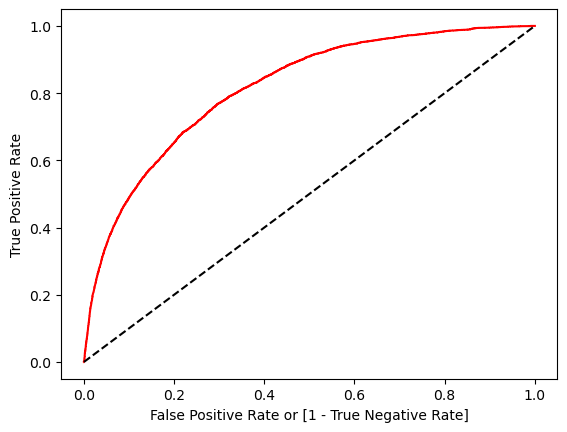

In [36]:
# ROC curve

fpr,tpr,thresholds = roc_curve(Y,model.predict_proba(X)[:,1])

auc = roc_auc_score(Y, predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [37]:
auc

0.5734694329116669